In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class LeNet:
    """
    Simplified LeNet model implementing sliding-window convolution manually.
    """

    def __init__(self, kernel: np.ndarray) -> None:
        """
        Initialize the model with a given convolution kernel.

        Parameters:
            kernel (np.ndarray): 2D numpy array (e.g., 3x3) for convolution.
        """
        self.kernel = kernel

    def sliding_window_convolution(self, image: np.ndarray) -> np.ndarray:
        """
        Apply a 3x3 convolution kernel to a 2D image using a sliding window.

        Parameters:
            image (np.ndarray): Grayscale image as a 2D numpy array.

        Returns:
            np.ndarray: Convolved image.
        """
        img_h, img_w = image.shape
        k_h, k_w = self.kernel.shape
        output_h, output_w = img_h - k_h + 1, img_w - k_w + 1

        # Initialize output array
        output = np.zeros((output_h, output_w))

        # Sliding window operation
        for i in range(output_h):
            for j in range(output_w):
                # Extract 3x3 region from the image
                region = image[i:i + k_h, j:j + k_w]
                # Apply element-wise multiplication and sum
                output[i, j] = np.sum(region * self.kernel)

        # Normalize output for better visualization
        output = np.clip(output, 0, 255)  # Clip values to [0, 255]
        return output.astype(np.uint8)

    def forward(self, image_path: str) -> None:
        """
        Load an image, apply convolution, and visualize results.

        Parameters:
            image_path (str): Path to the input image.
        """
        # Load image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Ensure image is loaded properly
        if image is None:
            raise ValueError("Error loading image. Check the file path.")

        # Apply convolution
        convolved_image = self.sliding_window_convolution(image)

        # Plot original and convolved images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap="gray")
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(convolved_image, cmap="gray")
        plt.title("Convolved Image (Edge Detection)")
        plt.axis("off")

        plt.show()

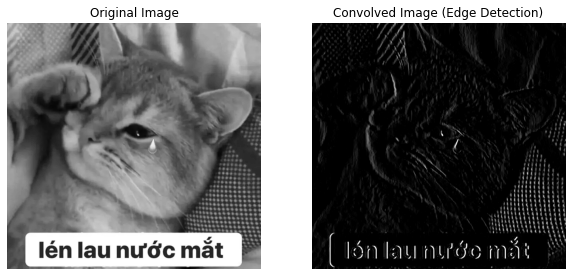

In [4]:
# Define a 3x3 edge detection kernel (Sobel X filter)
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Create LeNet model instance
lenet = LeNet(kernel)

# Run the model with an image
image_path = "cat.png"  # Change this to your image path
lenet.forward(image_path)